In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import collections
import time
from scipy import stats

In [2]:
# %matplotlib inline
# from IPython.display import display
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statistics import stdev

from sklearn import tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

e:\new folder (2)\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
# np.random.seed(1)

In [4]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    #how many correct predictions?
    correct = 0
    #for each actual label
    for i in range(len(actual)):
        #if actual matches predicted label
        if actual[i] == predicted[i]:
            #add 1 to the correct iterator
            correct += 1
    #return percentage of predictions that were correct
    return correct / float(len(actual)) * 100.0

In [5]:
# confussion_matrik(y,pred)

In [6]:
# accuracy,sensitivity,specifity = acc_sens_spec(y,pred)
# print('acc',accuracy)
# print('sens',sensitivity)
# print('spec',specifity)

In [7]:
# accuracy_metric(y,RF.predict(X))

In [8]:
def cross_val_split(X,fold=2,seed=0):
    np.random.seed(seed)
    n_folds= fold
    size = X.shape[0]/n_folds
    X_idx = list(range(X.shape[0]))
    folds_data= []
    for i in range(n_folds):
#         print(X_idx)
        random_idx = list(np.random.choice(X_idx,int(size),replace=False))
#         print(random_idx)
        X_idx = [idx for idx in X_idx if idx not in random_idx]
#         print(X_idx)

        folds_data.append(random_idx)
#         print("--")
    return folds_data

def kfold_cross_validation(model,X,y, n_fold=2, n_seed=0):
    folds = cross_val_split(X,fold=n_fold,seed=n_seed)
    fold_result =[]
    for i in range(len(folds)):
    #     print(i)
        train = []
        for j in range(len(folds)):
            if j != i:
                train = train + folds[j]
        test = folds[i]

        X_train = X.iloc[train,:].reset_index(drop=True)
        y_train = y[train].reset_index(drop=True)

        X_test = X.iloc[test,:].reset_index(drop=True)
        y_test = y[test].reset_index(drop=True)


        t0 = time.time()
        model.fit(X_train, y_train)
        t1 = time.time()
        waktu = t1 - t0

        predict = model.predict(X_test)
        accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

        result = [accuracy,sensitivity,specifity,precision,recall,f1_score,waktu]
        fold_result.append(result)
        
    return fold_result

In [9]:
from sklearn.decomposition import PCA
import pylab as pl
def plot_this(X_rs,y_rs,method):
  # Use principal component to condense the 10 features to 2 features
  pca = PCA(n_components=2).fit(X_rs)
  pca_2d = pca.transform(X_rs)
  # Assign colors
  for i in range(0, pca_2d.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
  pl.legend([c1, c2], ['Class 1', 'Class 2'])
  pl.title(method)
  pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
  pl.show()
    


## ---------

In [24]:
##read data

train = pd.read_csv('data/ucsd_fico_train.csv',sep=",")
test = pd.read_csv('data/ucsd_fico_test.csv',sep=",")
df = train.copy()
df['Class'] = test
# df = pd.read_csv('data/sample_data.csv',sep=",")

# df0 = df.copy()
# df.info()

In [25]:
train.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1


In [26]:
test.head()

,0
0,0
1,0
2,0
3,0
4,0


In [27]:
df.columns

Index(['amount', 'hour1', 'state1', 'zip1', 'custAttr1', 'field1', 'custAttr2',
       'field2', 'hour2', 'flag1', 'total', 'field3', 'field4', 'indicator1',
       'indicator2', 'flag2', 'flag3', 'flag4', 'flag5', 'Class'],
      dtype='object')

In [12]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [28]:
df['Class'].value_counts()

0.0    97345
1.0     2654
Name: Class, dtype: int64

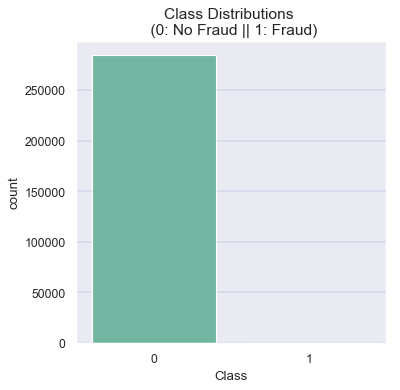

In [14]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df,palette='Set2')


In [15]:
count = 0
for a in df.columns[1:]:
    if df[a].isnull().sum() > 0 :
#         print(a)
        count+=1
count

0

In [16]:
# from imblearn.under_sampling import (RandomUnderSampler, 
#                                      ClusterCentroids,
#                                      TomekLinks,
#                                      NeighbourhoodCleaningRule,
#                                      NearMiss)

In [17]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# df['scaled_amount'] = minmax_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
# df['scaled_time'] = minmax_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [18]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df_copy = df.copy()
# df_copy = df_copy.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df_copy.loc[df_copy['Class'] == 1]
# non_fraud_df = df_copy.loc[df['Class'] == 0][:492]
non_fraud_df = df_copy.loc[df_copy['Class'] == 0].sample(n=492,random_state=1)

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=1)
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis=1)
df_new.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.195626,0.516160,-0.865285,-0.979506,2.587540,-2.781144,-0.887336,-0.579689,-0.976755,0.132058,...,-0.211955,-0.106978,-0.010528,-0.211955,0.021026,0.358237,-0.209483,0.062051,0.074730,0
1,11.218193,-0.166308,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,...,2.285758,1.096342,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269,1
2,8.555858,0.964990,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,...,0.033804,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,1
3,5.094669,-0.102269,0.531678,-1.108844,0.276972,0.386453,-1.038906,-0.810526,0.395582,-0.322635,...,0.801043,0.000589,-0.824566,-0.174821,0.479535,-0.094335,0.698329,-0.130716,0.083227,0
4,-0.223713,0.613447,1.878626,0.162765,-0.167433,3.465196,0.197332,1.157212,-0.676783,0.473890,...,-0.342723,-0.217428,-0.785738,0.406279,-0.056071,-0.560484,-0.388620,-0.012717,-0.038421,0


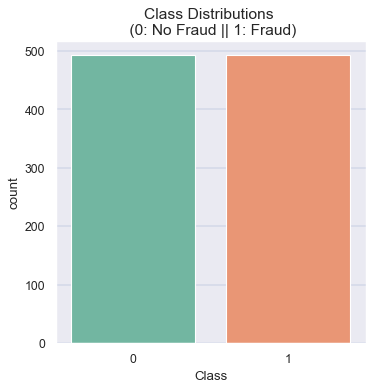

In [19]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df_new,palette='Set2')

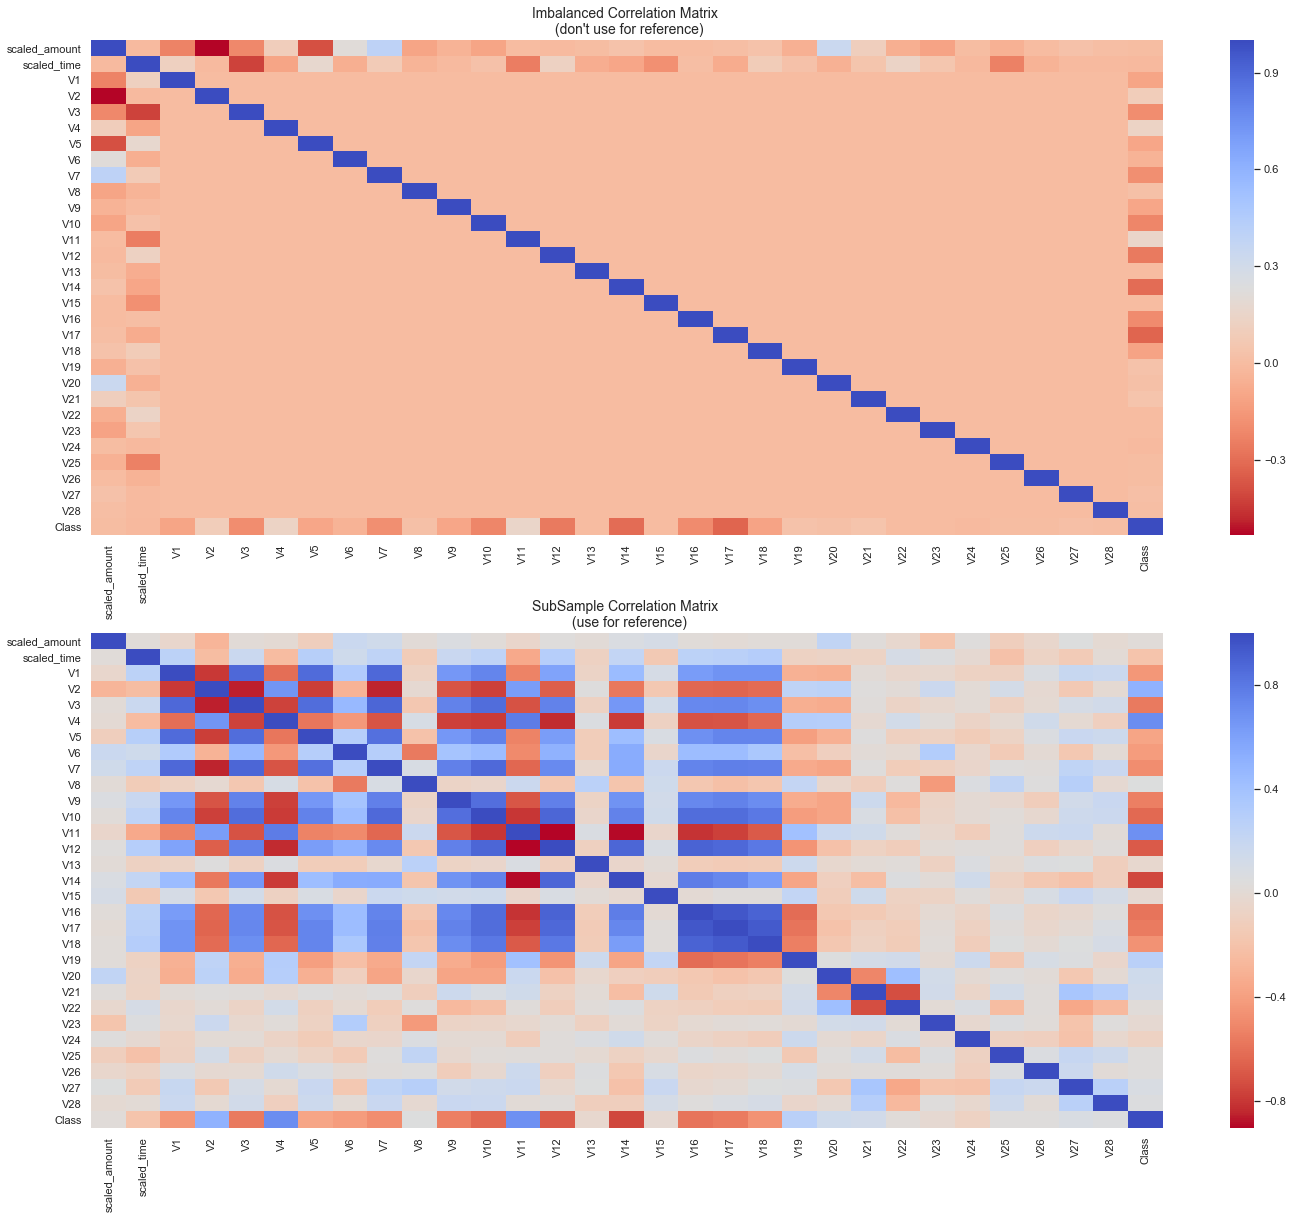

In [20]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = df_new.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Correlation Matrices
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.
Summary and Explanation:
Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.
Note: We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

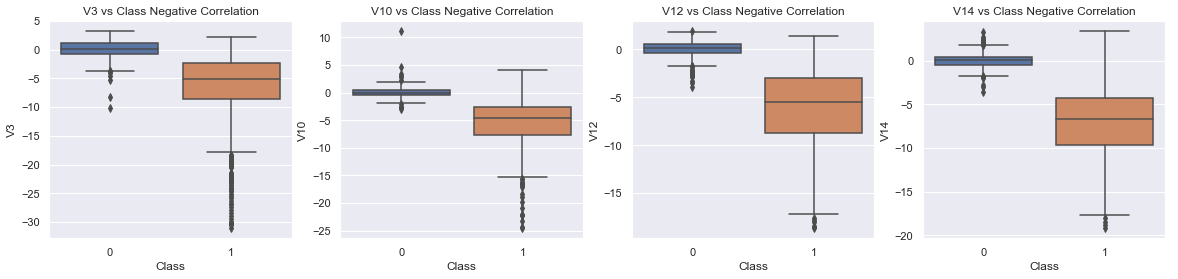

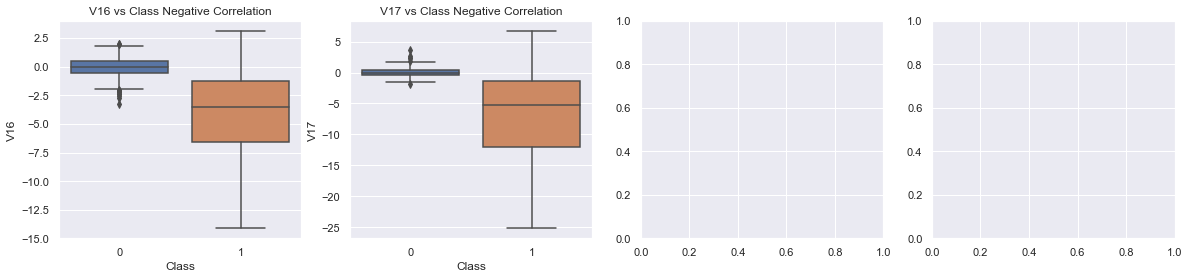

In [21]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V3", data=df_new, ax=axes[0])
axes[0].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=df_new, ax=axes[1])
axes[1].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=df_new, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df_new, ax=axes[3])
axes[3].set_title('V14 vs Class Negative Correlation')

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V16", data=df_new, ax=axes[0])
axes[0].set_title('V16 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V17", data=df_new, ax=axes[1])
axes[1].set_title('V17 vs Class Negative Correlation')

plt.show()

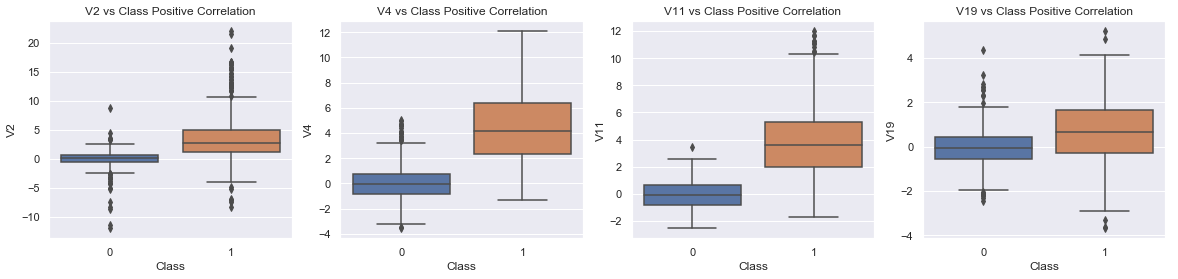

In [22]:

f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V2", data=df_new,  ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df_new,  ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=df_new, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=df_new, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

### ---------------------------------------

In [23]:
# X = df.drop('Class', axis=1)
# y = df['Class'].copy()

In [24]:
X_new = df_new.drop('Class', axis=1)
y_new = df_new['Class'].copy()

In [25]:
y_new.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [26]:
X_new.columns

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28'],
      dtype='object')

In [27]:
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# # RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
# rob_scaler = RobustScaler()
# minmax_scaler = MinMaxScaler()

# X_neww = minmax_scaler.fit_transform(X_new)
# X_new = pd.DataFrame(X_neww, columns=X_new.columns)
# X_new.tail()

# # SKLearn


In [28]:
from sklearn.ensemble import RandomForestClassifier
n_tree = 10
clf = RandomForestClassifier(random_state=1,n_estimators=n_tree, max_features='sqrt')
clf.fit(X_new,y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=1)
clf_DT.fit(X_new,y_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [30]:
def run_skenarion_1 (clf,X,y,kfolds):
    CV_SKLearn = kfold_cross_validation(clf,X,y,n_fold=kfolds,n_seed=1)
    df_result = pd.DataFrame(data= CV_SKLearn, columns=['Akurasi','Sensitivity','Specifity','precision','recall','f1_score','Waktu'])

    df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
    df_result = df_result.set_index('No')

    del df_result.index.name

    df_result = df_result.append(df_result.describe()[1:2])
    
    return df_result
# result_SKLearn = result_SKLearn.append('')

In [31]:
result_SKLearn = run_skenarion_1(clf,X_new,y_new,5)
result_SKLearn

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
1,0.928571,0.861702,0.990196,0.987805,0.861702,0.920455,0.044108
2,0.938776,0.915094,0.966667,0.970000,0.915094,0.941748,0.062505
3,0.964286,0.936842,0.990099,0.988889,0.936842,0.962162,0.046881
4,0.913265,0.849462,0.970874,0.963415,0.849462,0.902857,0.046878
5,0.933673,0.881188,0.989474,0.988889,0.881188,0.931937,0.046878
mean,0.935714,0.888858,0.981462,0.979799,0.888858,0.931832,0.049450


In [32]:
result_SKLearn = run_skenarion_1(clf_DT,X_new,y_new,5)
result_SKLearn

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
1,0.877551,0.851064,0.901961,0.888889,0.851064,0.869565,0.031247
2,0.882653,0.905660,0.855556,0.880734,0.905660,0.893023,0.015625
3,0.918367,0.926316,0.910891,0.907216,0.926316,0.916667,0.046875
4,0.872449,0.892473,0.854369,0.846939,0.892473,0.869110,0.031248
5,0.908163,0.920792,0.894737,0.902913,0.920792,0.911765,0.031250
mean,0.891837,0.899261,0.883503,0.885338,0.899261,0.892026,0.031249


In [33]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


clf_KNN = KNeighborsClassifier(),
clf_SVM = SVC(),
clf_NB = GaussianNB(),
clf_DT_ = DecisionTreeClassifier(random_state=1),
clf_RF = RandomForestClassifier(random_state=1,n_estimators=10)
##skenario 
skenario_1 = {}
skenario_1['1'] = clf_KNN,
skenario_1['2'] = clf_SVM,
skenario_1['3'] = clf_NB,
skenario_1['4'] = clf_DT_,
skenario_1['5'] = clf_RF

In [34]:
for i in skenario_1:
    
    if isinstance(skenario_1[i], tuple) :
        clf_skenario = skenario_1[i][0][0]
    else :
        clf_skenario = skenario_1[i]
#     print('komposisi', i)

    
    result_SKLearn = run_skenarion_1(clf_skenario,X_new,y_new,5)
#     print(result_SKLearn)
    
    nama_file = 'hasil/skenario1/random_klasik/komposisi999.csv'
    nama_file = nama_file.replace('999',str(i))

    result_SKLearn.to_csv(nama_file, sep=';',index=False)
                


e:\new folder (2)\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\new folder (2)\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\new folder (2)\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
e:\new folder (2)\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gam

In [35]:
df_result = pd.DataFrame()
for i in skenario_1:
    nama_file = 'hasil/skenario1/random_klasik/komposisi999.csv'
    nama_file = nama_file.replace('999',str(i))
    df_komposisi = pd.read_csv(nama_file,sep=";")
    df_result = df_result.append(df_komposisi.iloc[5:,:])
    
df_result.insert(loc=0, column='No', value=list(range(df_result.shape[0])))
df_result = df_result.set_index('No')

del df_result.index.name

df_result.to_csv('hasil/skenario1/random_klasik/result.csv', sep=';',index=False)
df_result

,Akurasi,Sensitivity,Specifity,precision,recall,f1_score,Waktu
0,0.934694,0.897244,0.970613,0.970894,0.897244,0.932013,0.009376
1,0.934694,0.915688,0.953227,0.951519,0.915688,0.932799,0.042612
2,0.920408,0.864924,0.975337,0.972553,0.864924,0.915417,0.003217
3,0.891837,0.899261,0.883503,0.885338,0.899261,0.892026,0.031246
4,0.935714,0.888858,0.981462,0.979799,0.888858,0.931832,0.050002


In [36]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
fitur_importance =[]
for f in range(X_new.shape[1]):
    if  importances[indices[f]] > 0 :
        fitur_importance.append([X_new.columns[indices[f]],importances[indices[f]]])
        print("%2d) %-*s %f" % (f + 1, 30,
        X_new.columns[indices[f]],
        importances[indices[f]]))

 1) V10                            0.244188
 2) V3                             0.167819
 3) V16                            0.111016
 4) V11                            0.092161
 5) V7                             0.078181
 6) V4                             0.048404
 7) V14                            0.028987
 8) V12                            0.023392
 9) V17                            0.021980
10) V19                            0.020749
11) V2                             0.015807
12) V8                             0.014738
13) scaled_amount                  0.012156
14) V1                             0.011635
15) V5                             0.010720
16) V21                            0.009909
17) V26                            0.009040
18) V18                            0.008570
19) V27                            0.007779
20) scaled_time                    0.007301
21) V20                            0.007071
22) V13                            0.006804
23) V6                          

In [37]:
df_FI = pd.DataFrame(data=fitur_importance,columns=['fitur','value'])
# np.array(df_FI['fitur'])
df_FI

,fitur,value
0,V10,0.244188
1,V3,0.167819
2,V16,0.111016
3,V11,0.092161
4,V7,0.078181
5,V4,0.048404
6,V14,0.028987
7,V12,0.023392
8,V17,0.021980
9,V19,0.020749


In [38]:
# dot_data = StringIO()  
# tree.export_graphviz(clf.estimators_[8], out_file=dot_data,  
#                          feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [39]:
# dot_data = StringIO()  
# tree.export_graphviz(clf_DT,out_file=dot_data,feature_names=X_new.columns)  
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())